In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kc-price-house/kc_house_data.csv
/kaggle/input/all-reg/all_reg_models.py


In [15]:
import os
os.listdir("/kaggle/input")

import sys
sys.path.append("/kaggle/input/all-reg")

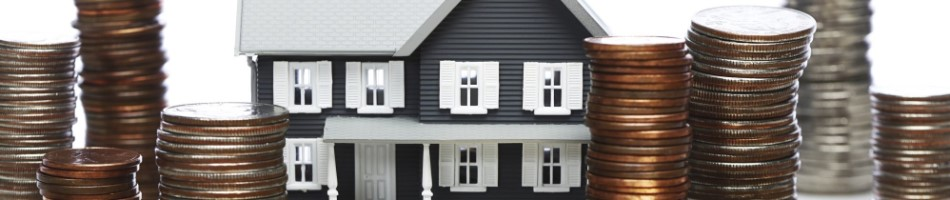

KC deki ev fiyatlarını tahmin eden bir model geliştiriyoruz.
veri seti: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [16]:
#kütüphaneleri yükle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Grafikleri jnb üzeridne göster
%matplotlib inline

In [18]:
pd.set_option("display.max_columns",None) #tüm sütunalrı göster

In [19]:
#Veri setini yükle

In [20]:
df = pd.read_csv("/kaggle/input/kc-price-house/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Bu veri seti, Seattle'ı içeren King County için ev satış fiyatlarını içermektedir. Mayıs 2014 ile Mayıs 2015 arasında satılan evleri kapsar.

Basit regresyon modellerini değerlendirmek için harika bir veri setidir.

Veri Sözlüğü:
- id: Bir ev için id no
- date: Evin satıldığı tarih
- price: Fiyat, [tahmin hedefi,y]
- bedrooms: Yatak odası sayısı
- bathrooms: Banyo sayısı/yatak odası
- sqft_living: Evdeki alanın metre karecinsinden büyüklüğü
- sqft_lot: Arsanın metre kare cinsinden büyüklüğü
- floors: Evdeki toplam kat sayısı
- waterfront: Su manzaralı ev
- view: Manzara
- condition: Genel olarak evin durumu ne kadar iyi
- grade: King County derecelendirme sistemi temelinde konut birimine verilen genel derece
- sqft_above: Bodrum hariç evin metre kare cinsinden büyüklüğü
- sqft_basement: Bodrumun  metre kare cinsinden büyüklüğü
- yr_built: Yapım yılı
- yr_renovated: Retorasyon yılı
- zipcode: Posta kodu
- lat: Enlem koordinatı
- long: Boylam koordinatı
- sqft_living15: 2015 yılında oturma odası alanı (bazı yenilemeleri ima eder). Bu, arsa büyüklüğü alanını etkilemiş olabilir veya olmayabilir.
- sqft_lot15: 2015 yılında arsa büyüklüğü (bazı yenilemeleri ima eder).

In [21]:
# EDA Automatik olarak yapılır

In [22]:
!pip install ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 46.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.12.1 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.25.2 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 16.1.0 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have sh

In [23]:
import ydata_profiling

In [24]:
#Keşifsel veri analiz raporu
profile=ydata_profiling.ProfileReport(df)
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
# EDA ve Veri Ön işleme Data Preprocessing

In [26]:
df[df['price']==df['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


## En pahalı ev lokasyına göre konum
https://www.google.com/maps/search/47.6298%09-122.323?sa=X&ved=1t:242&ictx=111

In [27]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##  Outlier Kontrolü (Aykırı değerler)

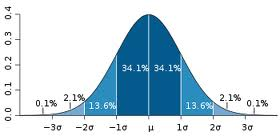

Normal dağılımda 3Sd +- verilerin %99.6 sını kapsar.
Geriye kalan % .4 ü aykırı değerlerdir.

In [28]:
#Grafik ile Aykırı değerleri gösterme

<Axes: ylabel='bathrooms'>

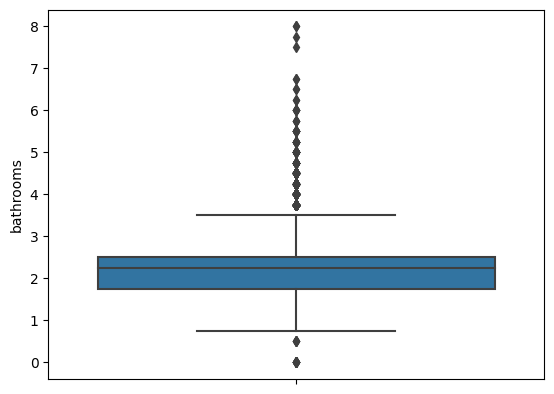

In [29]:
%matplotlib inline
sns.boxplot(y=df['bathrooms'], data=df)

<Axes: xlabel='price'>

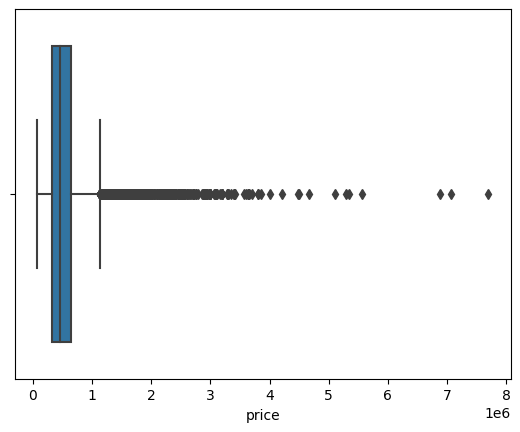

In [30]:
sns.boxplot(x=df['price'], data=df)

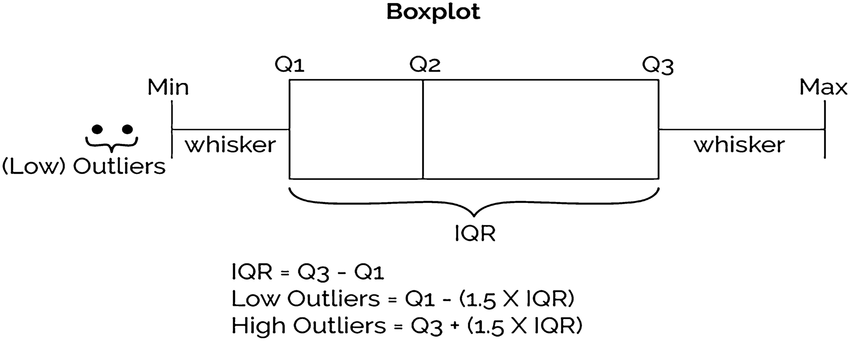

# Outliers için 1. yöntem
df_bedrooms_outliers_min=df2[df2['bedrooms']<df2['bedrooms'].mean()-3*df2['bedrooms'].std()]

In [31]:
#2. Yöntem
df_kor=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot']] # Aykırı değer olan sütunların tespiti
outliers=df_kor.quantile(q=.99)
outliers

price          1964400.00
bedrooms             6.00
bathrooms            4.25
sqft_living       4978.80
sqft_lot        213008.00
Name: 0.99, dtype: float64

In [32]:
df_non_outliers=df[df['price']<outliers['price']]

In [33]:
df_non_outliers=df_non_outliers[df_non_outliers['bedrooms']<outliers['bedrooms']]

In [34]:
df_non_outliers=df_non_outliers[df_non_outliers['sqft_living']<outliers['sqft_living']]

In [35]:
df_non_outliers=df_non_outliers[df_non_outliers['sqft_lot']<outliers['sqft_lot']]

In [36]:
df_non_outliers.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.077400e+04,2.077400e+04,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000
mean,4.617201e+09,5.099878e+05,3.311254,2.070545,2008.980841,11713.006691,1.486040,0.005247,0.204968,3.409935,7.601232,1735.473910,273.506932,1970.880235,80.795658,98078.548185,47.559825,-122.215633,1955.816213,11031.837922
std,2.876712e+09,2.753241e+05,0.827587,0.718490,802.631011,18817.739040,0.539422,0.072247,0.709782,0.650089,1.109744,750.747988,413.987609,29.334521,393.369803,53.576531,0.138872,0.140006,651.499251,19116.131084
min,1.200019e+06,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,651.000000
25%,2.141500e+09,3.190000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.469725,-122.330000,1480.000000,5060.000000
50%,3.959401e+09,4.450000e+05,3.000000,2.250000,1880.000000,7500.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98065.000000,47.570900,-122.234000,1820.000000,7551.000000
75%,7.345528e+09,6.250000e+05,4.000000,2.500000,2480.000000,10305.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,530.000000,1996.000000,0.000000,98118.000000,47.678800,-122.127000,2320.000000,9900.000000
max,9.900000e+09,1.960000e+06,5.000000,5.250000,4970.000000,212639.000000,3.500000,1.000000,4.000000,5.000000,13.000000,4930.000000,2350.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000


<Axes: xlabel='price', ylabel='Count'>

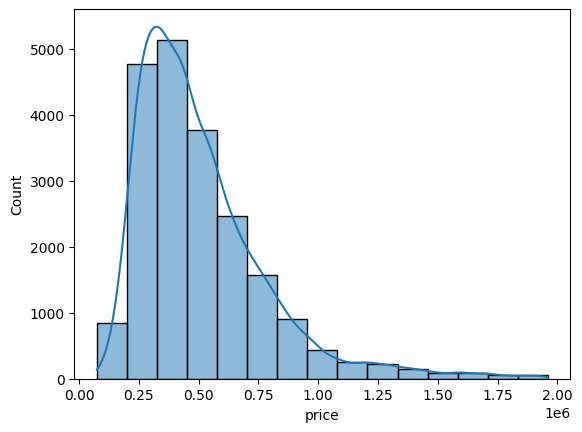

In [37]:
sns.histplot(df_non_outliers['price'], bins=15, kde=True)

In [38]:
df_non_outliers['zipcode'].dtype

dtype('int64')

In [39]:
df_non_outliers['zipcode']=df_non_outliers['zipcode'].astype('category')

In [40]:
df_non_outliers['zipcode'].dtype

CategoricalDtype(categories=[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008,
                  98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027,
                  98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038,
                  98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056,
                  98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077,
                  98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109,
                  98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125,
                  98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166,
                  98168, 98177, 98178, 98188, 98198, 98199],
, ordered=False, categories_dtype=int64)

In [41]:
df_non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20774 non-null  int64   
 1   date           20774 non-null  object  
 2   price          20774 non-null  float64 
 3   bedrooms       20774 non-null  int64   
 4   bathrooms      20774 non-null  float64 
 5   sqft_living    20774 non-null  int64   
 6   sqft_lot       20774 non-null  int64   
 7   floors         20774 non-null  float64 
 8   waterfront     20774 non-null  int64   
 9   view           20774 non-null  int64   
 10  condition      20774 non-null  int64   
 11  grade          20774 non-null  int64   
 12  sqft_above     20774 non-null  int64   
 13  sqft_basement  20774 non-null  int64   
 14  yr_built       20774 non-null  int64   
 15  yr_renovated   20774 non-null  int64   
 16  zipcode        20774 non-null  category
 17  lat            20774 non-null  float

<Axes: >

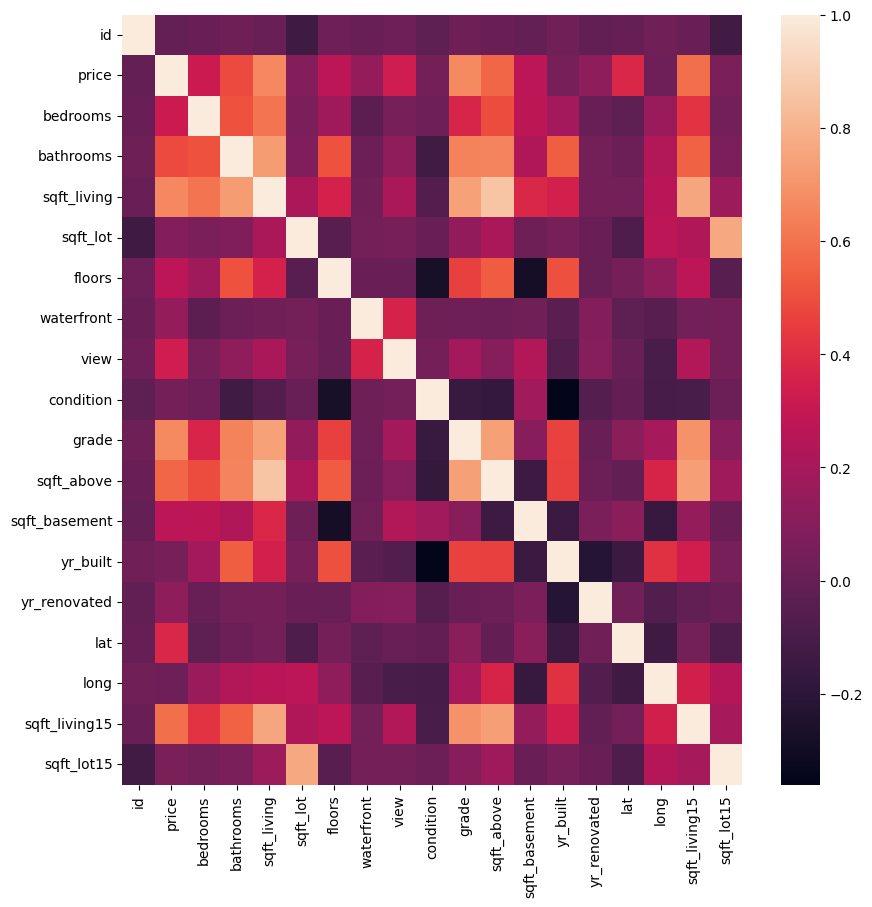

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df_non_outliers.corr(numeric_only=True))

In [43]:
# Price ile korelasyon sıralaması pozitif olanalrı alır dikkat edin
df_cor=df_non_outliers.corr(numeric_only=True).sort_values('price', ascending=False)['price'].head(10)

In [44]:
df_cor

price            1.000000
grade            0.665925
sqft_living      0.661235
sqft_living15    0.588437
sqft_above       0.559291
bathrooms        0.487293
lat              0.378875
view             0.335769
bedrooms         0.315142
floors           0.269345
Name: price, dtype: float64

In [45]:
df_cor[df_cor>.5]

price            1.000000
grade            0.665925
sqft_living      0.661235
sqft_living15    0.588437
sqft_above       0.559291
Name: price, dtype: float64

In [46]:
#Emlak sektöründeki bilgileri kullanıyoruz
#Özellik dönüşümü
#Yatak odası ev fiyatı üzerdne çok etkili

In [47]:
df_non_outliers['bedrooms']=df_non_outliers['bedrooms']**2
df_non_outliers['bathrooms']=df_non_outliers['bathrooms']**2
df_non_outliers['sqft_living']=df_non_outliers.sqft_living**2

In [48]:
df['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64

In [49]:
df_non_outliers['age']=2015-df_non_outliers['yr_built']

In [50]:
df_non_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,20141209T000000,538000.0,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,64
2,5631500400,20150225T000000,180000.0,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,20141209T000000,604000.0,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,20150218T000000,510000.0,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,9,6.2500,2340900,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,6
21609,6600060120,20150223T000000,400000.0,16,6.2500,5336100,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1
21610,1523300141,20140623T000000,402101.0,4,0.5625,1040400,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6
21611,291310100,20150116T000000,400000.0,9,6.2500,2560000,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,11


In [51]:
df_non_outliers['age'].max()

115

In [52]:
df_non_outliers[df_non_outliers['age']==115].iloc[0]

id                    1175000570
date             20150312T000000
price                   530000.0
bedrooms                      25
bathrooms                    4.0
sqft_living              3276100
sqft_lot                    4850
floors                       1.5
waterfront                     0
view                           0
condition                      3
grade                          7
sqft_above                  1810
sqft_basement                  0
yr_built                    1900
yr_renovated                   0
zipcode                    98107
lat                        47.67
long                    -122.394
sqft_living15               1360
sqft_lot15                  4850
age                          115
Name: 14, dtype: object

In [53]:
df_non_outliers['yr_renovated'].describe()

count    20774.000000
mean        80.795658
std        393.369803
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [54]:
#restoreasyon yapılıp yapılmadığı bilgisi
df_non_outliers['yr_renovated']=np.where(df_non_outliers['yr_renovated']==0,0,1) # restorasyon yılı değeri 0 sa sıfır olsun ama sıfır değilse 1 yap

In [55]:
df_non_outliers['renovated']=df_non_outliers['yr_renovated']
df_non_outliers.drop('yr_renovated',axis=1,inplace=True)

In [56]:
df_non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20774 non-null  int64   
 1   date           20774 non-null  object  
 2   price          20774 non-null  float64 
 3   bedrooms       20774 non-null  int64   
 4   bathrooms      20774 non-null  float64 
 5   sqft_living    20774 non-null  int64   
 6   sqft_lot       20774 non-null  int64   
 7   floors         20774 non-null  float64 
 8   waterfront     20774 non-null  int64   
 9   view           20774 non-null  int64   
 10  condition      20774 non-null  int64   
 11  grade          20774 non-null  int64   
 12  sqft_above     20774 non-null  int64   
 13  sqft_basement  20774 non-null  int64   
 14  yr_built       20774 non-null  int64   
 15  zipcode        20774 non-null  category
 16  lat            20774 non-null  float64 
 17  long           20774 non-null  float

In [57]:
#Bodrum evi var mı yok mu
df_non_outliers['sqft_basement']=np.where(df_non_outliers['sqft_basement']==0,0,1)

In [58]:
df_non_outliers['sqft_basement']

0        0
1        1
2        0
3        1
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: sqft_basement, Length: 20774, dtype: int64

In [59]:
# Özellikleri ve hedefi belirleyelim
X=df_non_outliers.drop(['price','date','id','lat','long'],axis=1)
y=df_non_outliers['price']

In [60]:
df_non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20774 non-null  int64   
 1   date           20774 non-null  object  
 2   price          20774 non-null  float64 
 3   bedrooms       20774 non-null  int64   
 4   bathrooms      20774 non-null  float64 
 5   sqft_living    20774 non-null  int64   
 6   sqft_lot       20774 non-null  int64   
 7   floors         20774 non-null  float64 
 8   waterfront     20774 non-null  int64   
 9   view           20774 non-null  int64   
 10  condition      20774 non-null  int64   
 11  grade          20774 non-null  int64   
 12  sqft_above     20774 non-null  int64   
 13  sqft_basement  20774 non-null  int64   
 14  yr_built       20774 non-null  int64   
 15  zipcode        20774 non-null  category
 16  lat            20774 non-null  float64 
 17  long           20774 non-null  float

In [61]:
#Kategorik verileri sayısal verilere dönüştürelim
X=pd.get_dummies(X, columns=['zipcode'],drop_first=True)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age,renovated,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,1340,5650,60,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,1,1951,1690,7639,64,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,2720,8062,82,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,1,1965,1360,5000,50,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,1800,7503,28,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,9,6.2500,2340900,1131,3.0,0,0,3,8,1530,0,2009,1530,1509,6,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

## Standard Scaler Ölçeklendirme

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler=StandardScaler()

In [64]:
X_scaler=scaler.fit_transform(X)

In [65]:
#Veri setini eğiitm ve test olarak ayırma
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.2,random_state=42)

In [66]:
#Modelleme
from all_reg_models import all_reg_models

In [67]:
all_reg_models(X_train,X_test,y_train,y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1784
[LightGBM] [Info] Number of data points in the train set: 16619, number of used features: 85
[LightGBM] [Info] Start training from score 510645.277454


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7833bd41e560>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/opt/conda/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /opt/conda/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory


Linear Regression: Average RMSE: 112405.30
Linear Regression: R2: 0.83
Decision Tree: Average RMSE: 164224.98
Decision Tree: R2: 0.64
Random Forest: Average RMSE: 117869.34
Random Forest: R2: 0.81
Gradient Boosting: Average RMSE: 128454.06
Gradient Boosting: R2: 0.78
XGBoost: Average RMSE: 105697.58
XGBoost: R2: 0.85
LightGBM: Average RMSE: 104442.25
LightGBM: R2: 0.85
Ridge: Average RMSE: 112405.01
Ridge: R2: 0.83
Lasso: Average RMSE: 112405.37
Lasso: R2: 0.83
ElasticNet: Average RMSE: 126029.45
ElasticNet: R2: 0.79
KNeighborsRegressor: Average RMSE: 114003.31
KNeighborsRegressor: R2: 0.83
SVR: Average RMSE: 279652.32
SVR: R2: -0.05
MLPRegressor: Average RMSE: 402353.57
MLPRegressor: R2: -1.18
**************************************************

Best Performing Model: LightGBM with Average RMSE: 104442.25 and R2: 0.85


In [68]:
from lightgbm import LGBMRegressor
lgbm_model=LGBMRegressor()

In [69]:
from sklearn.metrics import r2_score, mean_squared_error
lgbm_model.fit(X_train,y_train)
y_pred=lgbm_model.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**.5
print('Model in R2 Score:',r2,
      '\nModel in RMSE Score:',rmse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1784
[LightGBM] [Info] Number of data points in the train set: 16619, number of used features: 85
[LightGBM] [Info] Start training from score 510645.277454
Model in R2 Score: 0.8533643989771101 
Model in RMSE Score: 104442.25299579177


In [70]:
# Katsayılar ve özellik değerleri
columns=X.columns
df_importance=pd.DataFrame({'Feature':columns,'Importance':lgbm_model.feature_importances_})

In [71]:
df_importance.sort_values(by='Importance',ascending=False).head(10)

,Feature,Importance
11,yr_built,280
2,sqft_living,206
12,sqft_living15,193
13,sqft_lot15,161
3,sqft_lot,160
8,grade,155
9,sqft_above,119
18,zipcode_98004,84
6,view,84
40,zipcode_98040,63
